## Clustering store


In [26]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
store_data = pd.read_csv('store.csv')

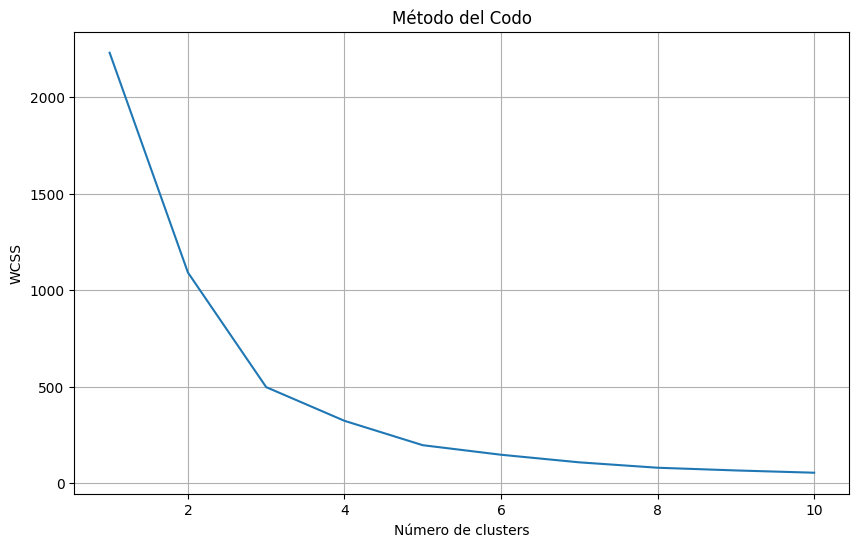

In [22]:
# Filtrar las columnas numéricas relevantes y manejar valores faltantes
clustering_data = store_data[['CompetitionDistance', 'Promo2']].fillna(store_data['CompetitionDistance'].median())

# Escalar los datos
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Método del codo para determinar el número óptimo de clusters para K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_scaled)
    wcss.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  
plt.grid(True)
plt.show()


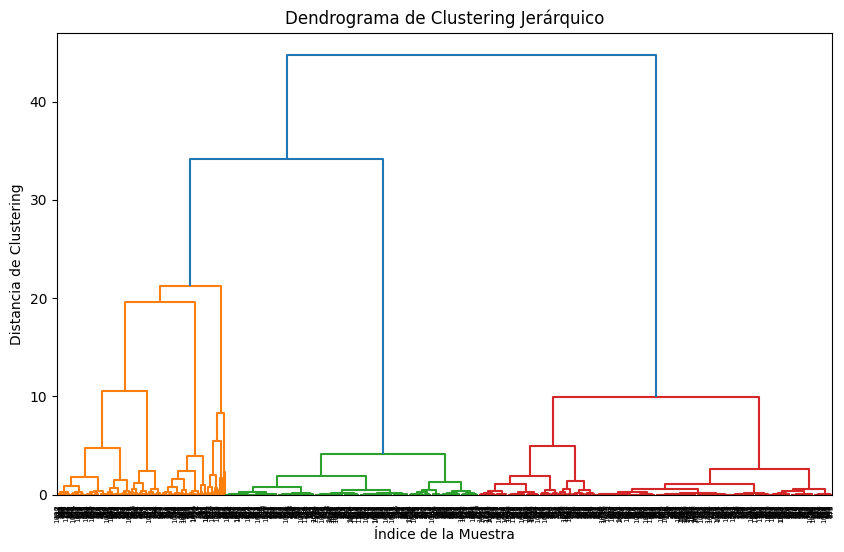

In [23]:
# Usar clustering jerárquico
linked = linkage(clustering_scaled, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Distancia de Clustering')
plt.show()


In [24]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(clustering_scaled)

# Añadir las etiquetas de cluster al DataFrame original para análisis
store_data['Cluster'] = cluster_labels

# Calcular los centroides de cada cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(cluster_centers, columns=['CompetitionDistance', 'Promo2'])

# Contar cuántas tiendas hay en cada cluster
cluster_counts = store_data['Cluster'].value_counts()

centroid_df, cluster_counts


(   CompetitionDistance        Promo2
 0          3331.277985  1.000000e+00
 1          3123.267544  5.551115e-16
 2         22824.796748  2.845528e-01,
 Cluster
 0    536
 1    456
 2    123
 Name: count, dtype: int64)

### Observaciones clustering

Cluster 0:

Cantidad de Tiendas: 536

Distancia Promedio a la Competencia: 3331 metros

Participación en Promo2: 100% (todas las tiendas en este cluster participan en promociones continuas)

Características: Este grupo está compuesto por tiendas que están relativamente cerca de sus competidores y que activamente participan en promociones continuas.

Cluster 1:

Cantidad de Tiendas: 456

Distancia Promedio a la Competencia: 3123 metros

Participación en Promo2: 0% (ninguna tienda en este cluster participa en promociones continuas)
Características: Tiendas que están cerca de la competencia pero no participan en el programa de p
romociones continuas.

Cluster 2:

Cantidad de Tiendas: 123

Distancia Promedio a la Competencia: 22825 metros

Participación en Promo2: 28.5% (una pequeña fracción participa en promociones continuas)

Características: Este grupo consiste en tiendas que están significativamente más alejadas de sus competidores más cercanos y tiene una baja tasa de participación en Promo2.

In [25]:
# Guardar el DataFrame con las etiquetas de cluster a un nuevo archivo CSV
store_data.to_csv('clustered_store_data.csv', index=False)
